In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data Preprocessing

In [5]:
airlines=pd.read_csv('EastWestAirlines.csv')

In [7]:
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [9]:
airlines.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [11]:
airlines[airlines.duplicated()]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


In [13]:
airlines.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


In [15]:
airlines.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [17]:
airlines.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

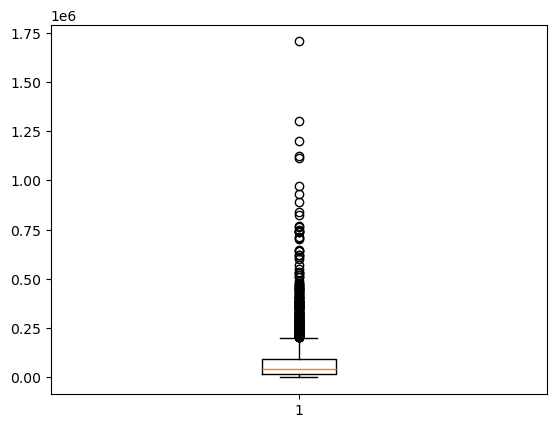

In [19]:
plt.boxplot(airlines['Balance'])
plt.show()

In [21]:
Q1 = airlines['Balance'].quantile(0.25)
Q3 = airlines['Balance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
airlines = airlines[(airlines['Balance'] >= lower_bound) & (airlines['Balance'] <= upper_bound)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1e58c20b350>,
 'caps': [<matplotlib.lines.Line2D at 0x1e58c20b920>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e58c20b080>],
 'medians': [<matplotlib.lines.Line2D at 0x1e58c20be30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e58c2380e0>],
 'means': []}

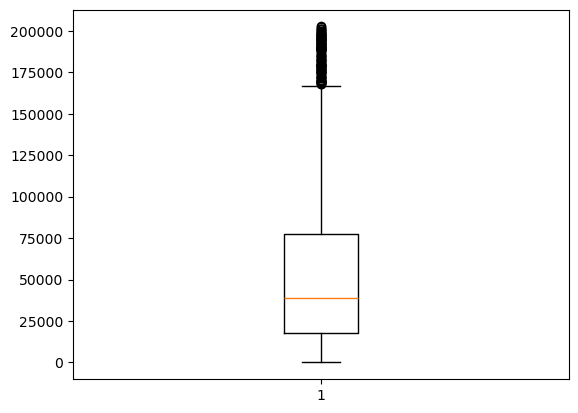

In [23]:
plt.boxplot(airlines['Balance'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e58c26f920>,
 'caps': [<matplotlib.lines.Line2D at 0x1e58c26fe90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e58c26f650>],
 'medians': [<matplotlib.lines.Line2D at 0x1e58c2ac3b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e58c2ac6b0>],
 'means': []}

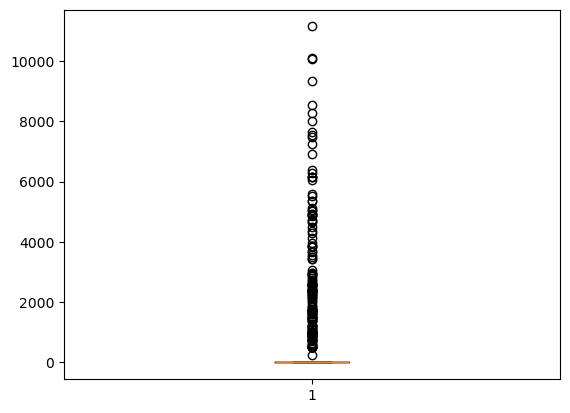

In [25]:
plt.boxplot(airlines['Qual_miles'])

In [27]:
Q1 = airlines['Qual_miles'].quantile(0.25)
Q3 = airlines['Qual_miles'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
airlines = airlines[(airlines['Qual_miles'] >= lower_bound) & (airlines['Qual_miles'] <= upper_bound)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1e58ba05f70>,
 'caps': [<matplotlib.lines.Line2D at 0x1e58ba06540>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e58ba05d00>],
 'medians': [<matplotlib.lines.Line2D at 0x1e58ba06a20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e58ba06cf0>],
 'means': []}

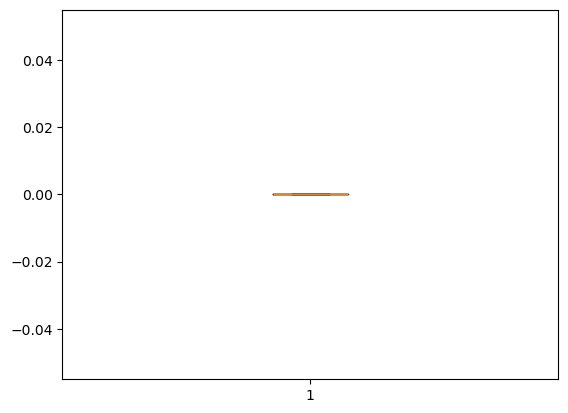

In [29]:
plt.boxplot(airlines['Qual_miles'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e58ba53350>,
 'caps': [<matplotlib.lines.Line2D at 0x1e58ba53920>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e58ba530e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e58ba53d40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e58ba80050>],
 'means': []}

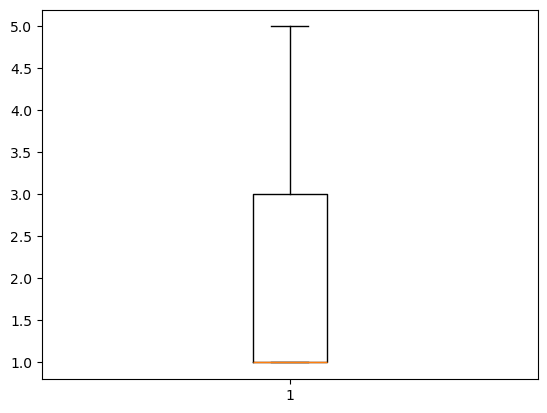

In [31]:
plt.boxplot(airlines['cc1_miles'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e58bac6ff0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e58bac75c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e58bac6d20>],
 'medians': [<matplotlib.lines.Line2D at 0x1e58bac7aa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e58bac7da0>],
 'means': []}

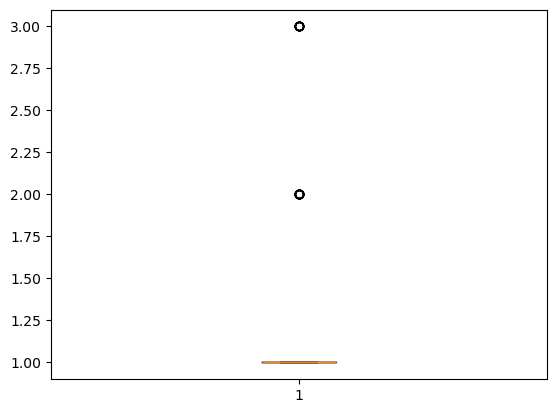

In [33]:
plt.boxplot(airlines['cc2_miles'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e58c45ab70>,
 'caps': [<matplotlib.lines.Line2D at 0x1e58c45b1a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e58c45a870>],
 'medians': [<matplotlib.lines.Line2D at 0x1e58c45b620>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e58c45b950>],
 'means': []}

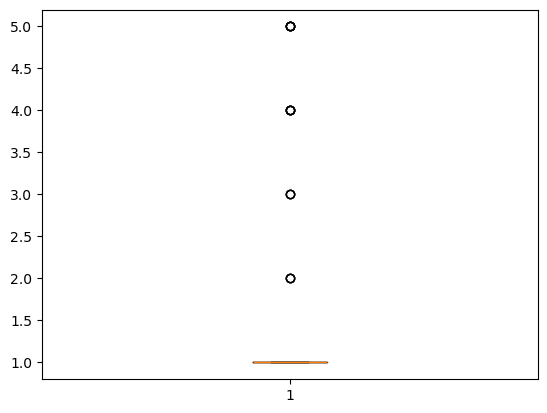

In [35]:
plt.boxplot(airlines['cc3_miles'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e58c4da690>,
 'caps': [<matplotlib.lines.Line2D at 0x1e58c4dac30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e58c4da3f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e58c4dadb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e58c4db0e0>],
 'means': []}

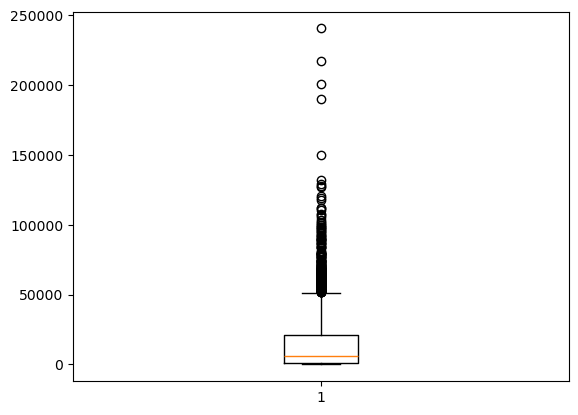

In [37]:
plt.boxplot(airlines['Bonus_miles'])

In [39]:
Q1 = airlines['Bonus_miles'].quantile(0.25)
Q3 = airlines['Bonus_miles'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
airlines = airlines[(airlines['Bonus_miles'] >= lower_bound) & (airlines['Bonus_miles'] <= upper_bound)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1e58b991d30>,
 'caps': [<matplotlib.lines.Line2D at 0x1e58b992e40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e58b9938f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e58b990770>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e58b9904d0>],
 'means': []}

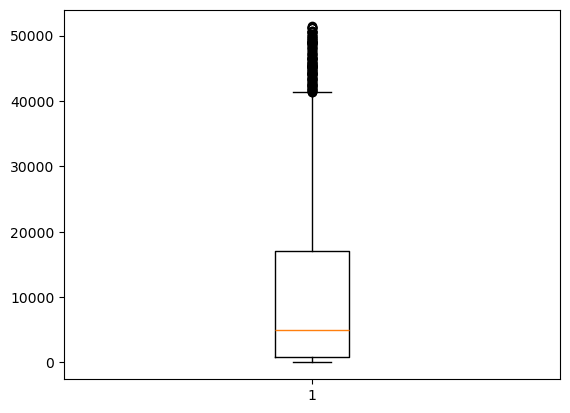

In [41]:
plt.boxplot(airlines['Bonus_miles'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e58c507830>,
 'caps': [<matplotlib.lines.Line2D at 0x1e58c507d70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e58c507560>],
 'medians': [<matplotlib.lines.Line2D at 0x1e58c2fc260>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e58c2fc500>],
 'means': []}

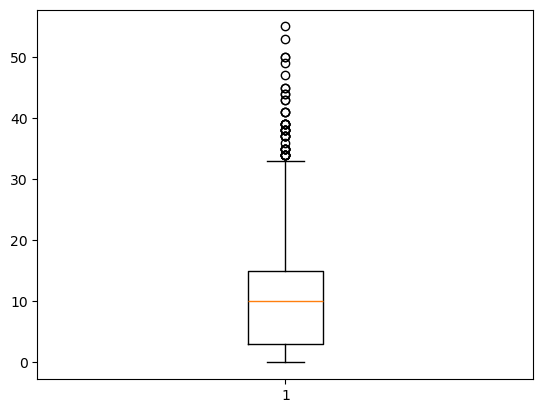

In [43]:
plt.boxplot(airlines['Bonus_trans'])

In [45]:
Q1 = airlines['Bonus_trans'].quantile(0.25)
Q3 = airlines['Bonus_trans'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
airlines = airlines[(airlines['Bonus_trans'] >= lower_bound) & (airlines['Bonus_trans'] <= upper_bound)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1e58c3418e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e58c341ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e58c3415e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e58c3423f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e58c342660>],
 'means': []}

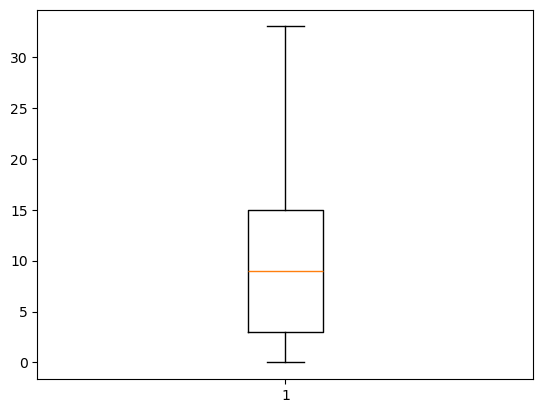

In [47]:
plt.boxplot(airlines['Bonus_trans'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e58c383b00>,
 'caps': [<matplotlib.lines.Line2D at 0x1e58c3c4110>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e58c383830>],
 'medians': [<matplotlib.lines.Line2D at 0x1e58c3c45f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e58c3c48c0>],
 'means': []}

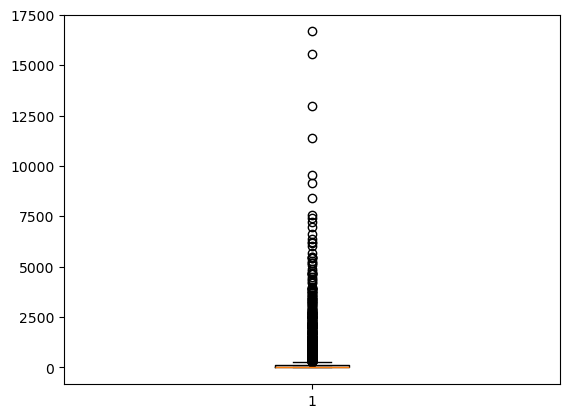

In [49]:
plt.boxplot(airlines['Flight_miles_12mo'])

In [51]:
Q1 = airlines['Flight_miles_12mo'].quantile(0.25)
Q3 = airlines['Flight_miles_12mo'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
airlines = airlines[(airlines['Flight_miles_12mo'] >= lower_bound) & (airlines['Flight_miles_12mo'] <= upper_bound)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1e58d65abd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e58d65b0e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e58d65a900>],
 'medians': [<matplotlib.lines.Line2D at 0x1e58d65b5f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e58d65b890>],
 'means': []}

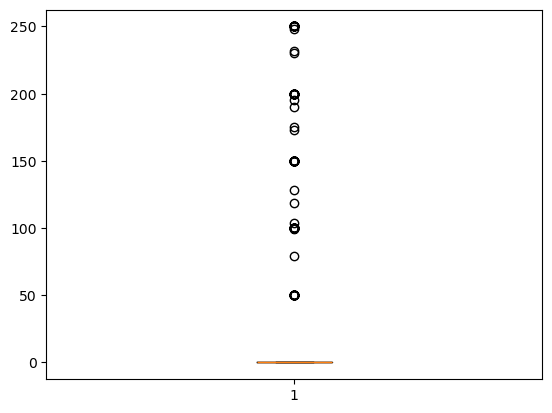

In [53]:
plt.boxplot(airlines['Flight_miles_12mo'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e58d6dc8c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e58d6dce30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e58d6dc620>],
 'medians': [<matplotlib.lines.Line2D at 0x1e58d6dd250>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e58d6dd550>],
 'means': []}

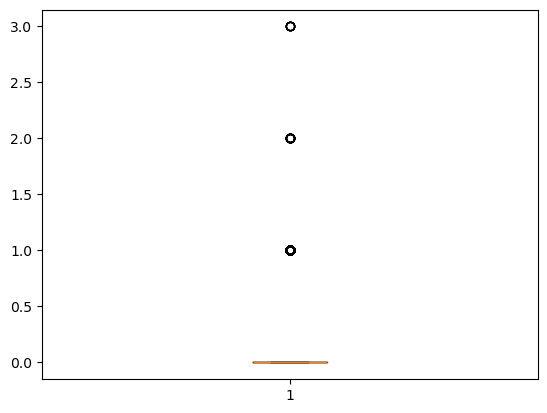

In [55]:
plt.boxplot(airlines['Flight_trans_12'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ef8b90f620>,
 'caps': [<matplotlib.lines.Line2D at 0x1ef8b90fc50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ef8b90f350>],
 'medians': [<matplotlib.lines.Line2D at 0x1ef8b994050>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ef8b994350>],
 'means': []}

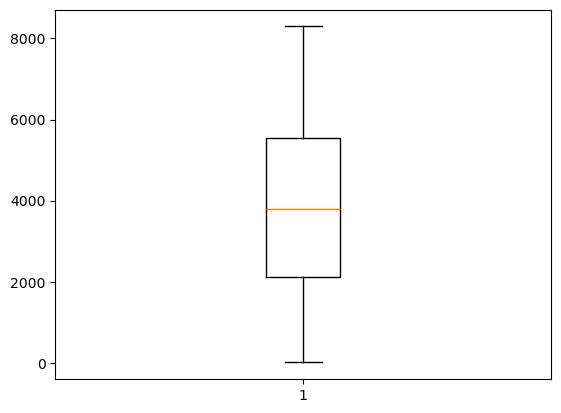

In [57]:
plt.boxplot(airlines['Days_since_enroll'])

### Hierarchical clustering

In [57]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

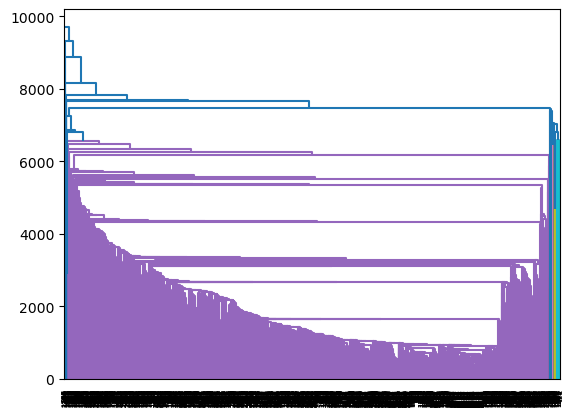

In [59]:
dendrogram = sch.dendrogram(sch.linkage(airlines, method='single'))

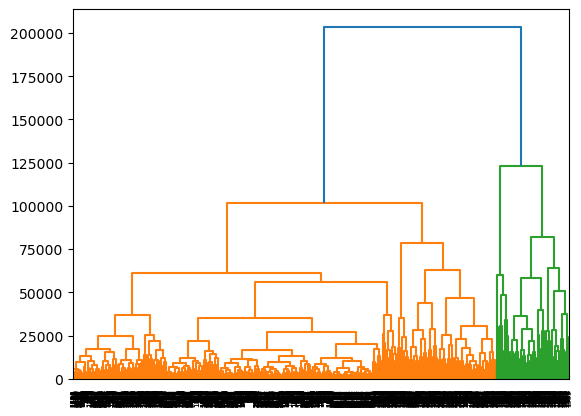

In [60]:
dendrogram = sch.dendrogram(sch.linkage(airlines, method='complete'))

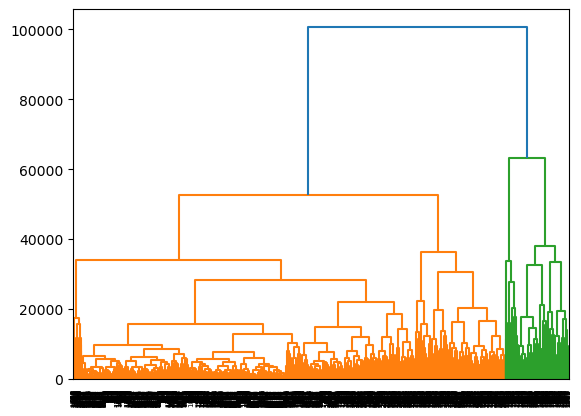

In [167]:
dendrogram = sch.dendrogram(sch.linkage(airlines, method='average'))

In [63]:
hc = AgglomerativeClustering(n_clusters=4,metric = 'euclidean' ,linkage = 'single')

In [65]:
y_hc = hc.fit_predict(airlines)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [67]:
Clusters

,Clusters
0,0
1,0
2,0
3,0
4,0
...,...
2578,0
2579,0
2580,0
2581,0


In [69]:
# airlines['h_clusterid'] = hc.labels_

In [71]:
#airlines

### K-Means Clustering

In [73]:
airlines_kmeans=airlines

In [75]:
airlines_kmeans

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [77]:
airlines_kmeans=airlines_kmeans.drop(["ID#","Qual_miles","cc1_miles","cc2_miles","cc3_miles","Flight_trans_12","Award?"],axis=1)

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(airlines_kmeans)

In [81]:
x

array([[-0.38885611, -0.77914724, -1.07138318, -0.24754726,  1.5093631 ],
       [-0.60589085, -0.775815  , -0.93610514, -0.24754726,  1.49377331],
       [-0.06665744, -0.4581955 , -0.66554907, -0.24754726,  1.52592726],
       ...,
       [ 0.49503794, -0.71355898, -0.53027104, -0.24754726, -1.22128705],
       [ 0.71970633,  1.27489509, -0.12443694, -0.24754726, -1.21787678],
       [-1.00167012, -0.79328895, -1.20666121, -0.24754726, -1.2198255 ]])

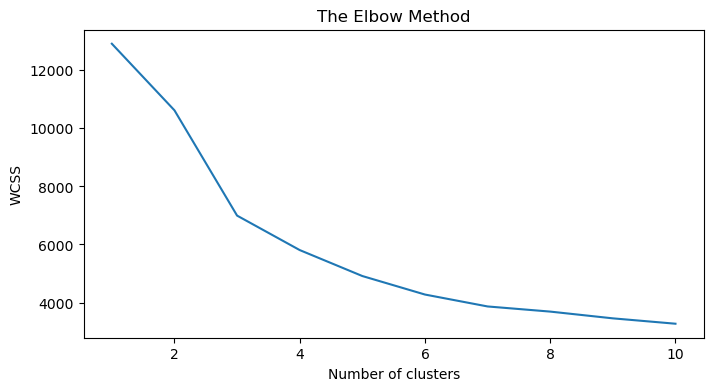

In [83]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
fig=plt.figure(figsize=(8,4))
WCSS=[]
for i in range(1,11): 
    model=KMeans(n_clusters=i).fit(x)
    WCSS.append(model.inertia_)
    
plt.plot(range(1,11),WCSS)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [85]:
clf=KMeans(n_clusters=7)
clf.fit(x)

KMeans(n_clusters=7)

In [87]:
y_means=clf.predict(x)

In [89]:
y_means

array([1, 1, 1, ..., 5, 0, 5])

In [91]:
clf.cluster_centers_

array([[-0.19180414,  0.14219222,  0.90147543, -0.21376911, -0.7543356 ],
       [-0.47199774, -0.67757291, -0.88391125, -0.22443205,  0.81553376],
       [ 2.09002313,  0.3799498 ,  0.49263049, -0.1800371 ,  0.55828174],
       [-0.15806516,  0.15254499,  0.72498328, -0.20650288,  0.95117251],
       [ 0.2982268 , -0.01902848,  0.0873508 ,  4.16761719, -0.01867248],
       [-0.53778744, -0.65428523, -0.86222709, -0.21023353, -0.94188261],
       [ 0.73970799,  2.23024906,  1.06385761, -0.17623783,  0.3150792 ]])

In [93]:
clf.labels_

array([1, 1, 1, ..., 5, 0, 5])

In [95]:
clf.inertia_

3864.757728260165

In [97]:
md=pd.Series(y_means)
airlines_kmeans['clust']=md
airlines_kmeans.head()

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Days_since_enroll,clust
0,28143,174,1,0,7000,1.0
1,19244,215,2,0,6968,1.0
2,41354,4123,4,0,7034,1.0
3,14776,500,1,0,6952,1.0
5,16420,0,0,0,6942,6.0


In [99]:
airlines_kmeans.iloc[:,1:].groupby(airlines_kmeans.clust).mean()

,Bonus_miles,Bonus_trans,Flight_miles_12mo,Days_since_enroll,clust
clust,,,,,
0.0,10447.872659,9.161049,12.149813,4205.258427,0.0
1.0,12036.287162,9.861486,16.087838,6411.810811,1.0
2.0,12380.627586,9.834483,7.931034,6054.875862,2.0
3.0,10943.952632,9.821053,8.421053,6650.689474,3.0
4.0,12003.088608,9.139241,13.291139,5175.493671,4.0
5.0,11037.416290,9.289593,8.357466,4008.158371,5.0
6.0,10460.962963,9.728395,8.166667,5568.129630,6.0


<Axes: xlabel='Bonus_miles', ylabel='Bonus_trans'>

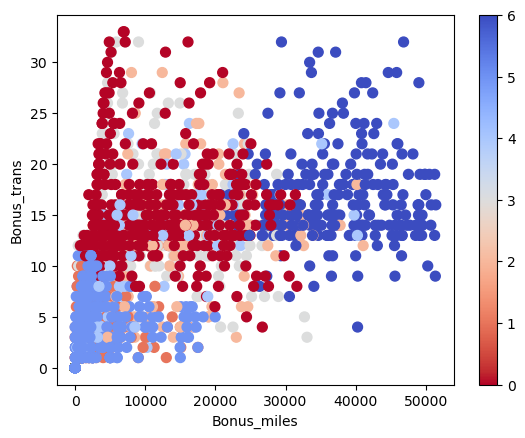

In [101]:
airlines_kmeans.plot("Bonus_miles","Bonus_trans",c=clf.labels_,kind="scatter",s=50,cmap=plt.cm.coolwarm_r)

In [103]:
import sklearn
sklearn.metrics.silhouette_score(x,clf.labels_)

0.2960592618446953

In [105]:
clf1=KMeans(n_clusters=6)
clf1.fit(x)

KMeans(n_clusters=6)

In [107]:
clf1.labels_

array([5, 5, 5, ..., 1, 4, 1])

In [109]:
sklearn.metrics.silhouette_score(x,clf1.labels_)

0.2980813500476809

In [111]:
clf2=KMeans(n_clusters=8)
clf2.fit(x)

KMeans()

In [113]:
clf2.labels_

array([0, 0, 0, ..., 4, 6, 2])

In [115]:
sklearn.metrics.silhouette_score(x,clf2.labels_)

0.2954141186624668

In [117]:
clf3=KMeans(n_clusters=3)
clf3.fit(x)

KMeans(n_clusters=3)

In [119]:
clf3.labels_

array([0, 0, 0, ..., 2, 1, 2])

In [121]:
sklearn.metrics.silhouette_score(x,clf3.labels_)

0.2419242110481663

### DBSCAN

In [124]:
airlines_dbscan=airlines

In [126]:
airlines_dbscan=airlines_dbscan.drop(["ID#","Qual_miles","cc1_miles","cc2_miles","cc3_miles","Flight_trans_12","Award?"],axis=1)

In [128]:
airlines_dbscan

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Days_since_enroll
0,28143,174,1,0,7000
1,19244,215,2,0,6968
2,41354,4123,4,0,7034
3,14776,500,1,0,6952
5,16420,0,0,0,6942
...,...,...,...,...,...
3993,3974,365,3,0,1397
3994,18476,8525,4,200,1403
3995,64385,981,5,0,1395
3996,73597,25447,8,0,1402


In [130]:
x

array([[-0.38885611, -0.77914724, -1.07138318, -0.24754726,  1.5093631 ],
       [-0.60589085, -0.775815  , -0.93610514, -0.24754726,  1.49377331],
       [-0.06665744, -0.4581955 , -0.66554907, -0.24754726,  1.52592726],
       ...,
       [ 0.49503794, -0.71355898, -0.53027104, -0.24754726, -1.22128705],
       [ 0.71970633,  1.27489509, -0.12443694, -0.24754726, -1.21787678],
       [-1.00167012, -0.79328895, -1.20666121, -0.24754726, -1.2198255 ]])

In [132]:
from sklearn.cluster import DBSCAN

In [134]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(x)

DBSCAN()

In [136]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [138]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [140]:
cl.value_counts()

cluster
 0         1970
-1          563
 5            7
 8            6
 9            6
 1            5
 2            5
 7            5
 3            4
 4            4
 6            4
 10           4
Name: count, dtype: int64

In [142]:
pd.concat([airlines_dbscan,cl],axis=1)

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Days_since_enroll,cluster
0,28143.0,174.0,1.0,0.0,7000.0,0.0
1,19244.0,215.0,2.0,0.0,6968.0,0.0
2,41354.0,4123.0,4.0,0.0,7034.0,0.0
3,14776.0,500.0,1.0,0.0,6952.0,0.0
5,16420.0,0.0,0.0,0.0,6942.0,-1.0
...,...,...,...,...,...,...
2564,NaN,NaN,NaN,NaN,NaN,-1.0
2568,NaN,NaN,NaN,NaN,NaN,0.0
2569,NaN,NaN,NaN,NaN,NaN,0.0
2573,NaN,NaN,NaN,NaN,NaN,0.0


<Axes: xlabel='Bonus_miles', ylabel='Bonus_trans'>

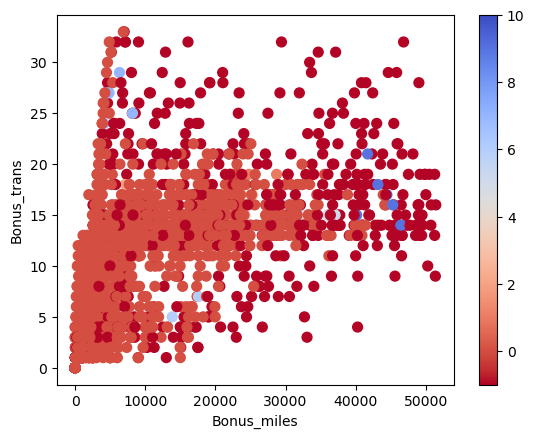

In [144]:
airlines_dbscan.plot("Bonus_miles","Bonus_trans",c=dbscan.labels_,kind="scatter",s=50,cmap=plt.cm.coolwarm_r)

In [146]:
sklearn.metrics.silhouette_score(x,dbscan.labels_)

-0.2265111031210355

In [148]:
dbscan1 = DBSCAN(eps=0.5, min_samples=10)
dbscan1.fit(x)

DBSCAN(min_samples=10)

In [150]:
dbscan1.labels_

array([ 0,  0,  0, ...,  0, -1,  0], dtype=int64)

In [152]:
sklearn.metrics.silhouette_score(x,dbscan1.labels_)

-0.20074238312269438

In [154]:
dbscan2 = DBSCAN(eps=0.7, min_samples=5)
dbscan2.fit(x)

DBSCAN(eps=0.7)

In [156]:
dbscan2.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [158]:
sklearn.metrics.silhouette_score(x,dbscan2.labels_)

0.09654708075117395

In [160]:
dbscan3 = DBSCAN(eps=0.7, min_samples=10)
dbscan3.fit(x)

DBSCAN(eps=0.7, min_samples=10)

In [162]:
dbscan3.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [164]:
sklearn.metrics.silhouette_score(x,dbscan3.labels_)

0.3579031050428543